# 어느 지역이 보험금을 잘 쓰는가?

데이터 분석을 통해 어느 지역이 보험금을 효율적으로 사용하고 있는지 확인하고자 합니다.\
이를 알아보기 위해 1인당 본인부담금이 얼마인지 알아보고, 그것을 지역별뿐만 아니라 성별, 연령별로도 나누어 데이터를 분석할 예정입니다.

# 1. 서론

## 보험의 종류

#### 건강보험

국민건강보험으로 우리가 흔히 아는 약국에서, 진료시에 어느정도 금액을 절감해주는 보험.

국민 상호간 위험분담 및 의료비 공동해결이라는 목적을 지니고 있음. 그렇기에 일정 법적 요건 달성시 강제로 납부의무 부여

입원시 80%, 외래진료시 병원 종류에 따라 의원 70%, 병원 60%, 종합병원 50%, 상급종합병원 40% 지원

#### 생명보험

사람의 생존 또는 사망과 관련하여 발생하는 경제적 손실을 보상해 주는 보험.

정액보상

생명보험사에서만 해당 상품 판매 가능

#### 손해보험

우연한 사건으로 발생하는 재산상 손해를 보상하는 보험

실손보상

손해보험사에서만 해당 상품 판매 가능

#### 제3보험

사람의 질병, 상해, 간병에 관해 약속한 금액을 지급하거나 그로 인한 손해를 보상하는 보험

실손보상과 정액보상 두 가지 모두를 포함.

손해보험사, 생명보험사 양사 모두에서 판매가능

갱신형 상품이 대부분으로 일반적인 정액보험과 달리 보험료가 매년 변동됨.

##### 실손보험

비용의 손해로 인한 금액을 측정해 일정금액 한도 내에서 실제 부담한 금액을 보장

##### 정액보험

질병 또는 재해로 인한 피해를 입을 경우 사전에 약정한 금액을 보장

# 2. 본론

## (1) 자료불러오기 및 정리하기

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#소수점 3자리까지 표시
%precision 3

'%.3f'

In [2]:
data1= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '38p연령성별',
                     header=[4,5], index_col = [0,1])
data2= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '40p',
                     header=[4,5], index_col = [0,1])
data3= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '42p',
                     header=[4,5], index_col = [0,1])
data4= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '44p',
                     header=[4,5], index_col = [0,1])
data5= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '46p',
                     header=[4,5], index_col = [0,1])

data1=data1.dropna()
data2=data2.dropna()
data3=data3.dropna()
data4=data4.dropna()
data5=data5.dropna()

In [3]:
total_data=pd.concat([data1.T,data2.T,data3.T,data4.T,data5.T]).T
total_data

구분
Division                                            계               \
                                         진료실인원\nPatients 내원일수\nVisit    
                                                                        
계                         Total 계 T          4.96342e+07  1.16511e+09   
                                남자 M         2.42965e+07  5.03416e+08   
                                여자 F         2.53376e+07  6.61697e+08   
서    울\nSeoul                      계   T      9.2221e+06  2.02046e+08   
                                 남자  M       4.39683e+06  8.60823e+07   
                                여자  F        4.82527e+06  1.15964e+08   
부    산\nBusan                      계   T     3.22622e+06  8.85023e+07   
                                 남자  M       1.55164e+06  3.69864e+07   
                                여자  F        1.67457e+06  5.15159e+07   
대    구\nDaegu                      계   T     2.31659e+06  5.65318e+07   
                                 남자  M       1.12158e+06  2.42336e+07   
                                여자  F        1.19501e+06  3.22982e+07   
인    천\nIncheon                    계   T     2.82126e+06  6.30116e+07   
                                 남자  M       1.38431e+06  2.73194e+07   
                                여자  F        1.43695e+06  3.56922e+07   
광    주\nGwangju                    계   T      1.3919e+06  3.44164e+07   
                                 남자  M            674528  1.47073e+07   
                                여자  F             717368  1.97091e+07   
대    전\nDaejeon                    계   T     1.40736e+06  3.36284e+07   
                                 남자  M            689084  1.46005e+07   
                                여자  F             718281  1.90279e+07   
울    산\nUlsan                      계   T     1.10159e+06  2.46982e+07   
                                 남자  M            556031   1.0995e+07   
                                여자  F             545556  1.37032e+07   
세    종\nSejong                     계   T          330066  7.02316e+06   
                                 남자  M            162776  3.13116e+06   
                                여자  F             167290    3.892e+06   
경    기\nGyonggi                    계   T     1.27705e+07  2.65817e+08   
                                 남자  M       6.31484e+06  1.17033e+08   
                                여자  F        6.45571e+06  1.48784e+08   
강    원\nGangwon                    계   T     1.45579e+06  3.28926e+07   
                                 남자  M            716561  1.45159e+07   
                                여자  F             739233  1.83766e+07   
충    북\nChungbuk                   계   T     1.54823e+06  3.74551e+07   
                                 남자  M            771528  1.64069e+07   
                                여자  F             776703  2.10482e+07   
충   남\nChungnam                    계   T     2.06826e+06  5.05758e+07   
                                 남자  M       1.03723e+06  2.23483e+07   
                                여자  F        1.03103e+06  2.82275e+07   
전    북\nJeonbuk                    계   T     1.74944e+06  5.13491e+07   
                                 남자  M            854547  2.17659e+07   
                                여자  F             894894  2.95831e+07   
전    남\nJeonnam                    계   T     1.80226e+06  5.41426e+07   
                                 남자  M            888791  2.29272e+07   
                                여자  F             913472  3.12154e+07   
경    북\nGyeongbuk                  계   T      2.5541e+06  6.59622e+07   
                                 남자  M       1.26199e+06  2.85949e+07   
                                여자  F        1.29211e+06  3.73673e+07   
경    남\nGyeongnam                  계   T     3.22667e+06   8.1606e+07   
                                 남자  M       1.59766e+06  3.51116e+07   
                                여자  F        1.62901e+06  4.64944e+07   
제    주\nJeju                       계   T          641778  

In [4]:
# 진료비-급여비=본인부담금
total_data[('계', '본인부담금')]=(total_data[('계','진료비\nMedical Expense')]-total_data[('계','급여비\nBenefit')])/total_data[('계','진료실인원\nPatients')]
total_data[('0~9세', '본인부담금')]=(total_data[('0~9세','진료비\nMedical Expense')]-total_data[('0~9세','급여비\nBenefit')])/total_data[('0~9세','진료실인원\nPatients')]
total_data[('10 ~ 19세', '본인부담금')]=(total_data[('10 ~ 19세','진료비\nMedical Expense')]-total_data[('10 ~ 19세','급여비\nBenefit')])/total_data[('10 ~ 19세','진료실인원\nPatients')]                            
total_data[('20 ~ 29세', '본인부담금')]=(total_data[('20 ~ 29세','진료비\nMedical Expense')]-total_data[('20 ~ 29세','급여비\nBenefit')])/total_data[('20 ~ 29세','진료실인원\nPatients')]
total_data[('30 ~ 39세', '본인부담금')]=(total_data[('30 ~ 39세','진료비\nMedical Expense')]-total_data[('30 ~ 39세','급여비\nBenefit')])/total_data[('30 ~ 39세','진료실인원\nPatients')]
total_data[('40 ~ 49세', '본인부담금')]=(total_data[('40 ~ 49세','진료비\nMedical Expense')]-total_data[('40 ~ 49세','급여비\nBenefit')])/total_data[('40 ~ 49세','진료실인원\nPatients')]
total_data[('50 ~ 59세', '본인부담금')]=(total_data[('50 ~ 59세','진료비\nMedical Expense')]-total_data[('50 ~ 59세','급여비\nBenefit')])/total_data[('50 ~ 59세','진료실인원\nPatients')]                                        
total_data[('60 ~ 69세', '본인부담금')]=(total_data[('60 ~ 69세','진료비\nMedical Expense')]-total_data[('60 ~ 69세','급여비\nBenefit')])/total_data[('60 ~ 69세','진료실인원\nPatients')]
total_data[('70 ~ 79세', '본인부담금')]=(total_data[('70 ~ 79세','진료비\nMedical Expense')]-total_data[('70 ~ 79세','급여비\nBenefit')])/total_data[('70 ~ 79세','진료실인원\nPatients')]
total_data[('80세 이상', '본인부담금')]=(total_data[('80세 이상','진료비\nMedical Expense')]-total_data[('80세 이상','급여비\nBenefit')])/total_data[('80세 이상','진료실인원\nPatients')]

In [5]:
total_data3 = total_data.T.iloc[[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]].T
total_data3.columns=['age_total','0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'above 80']

total_data4=total_data3.unstack()
new_index=['region_total','Seoul','Busan','Daegu','Incheon','Gwangju','Daejeon','Ulsan','Sejong','Gyonggi','Gangwon',
          'Chungbuk','Chungnam','Jeonbuk','Jeonnam','Gyeongbuk','Gyeongnam','Jeju']
total_data4.index=new_index

total_1인당본인부담금=total_data4.stack()

total_1인당본인부담금_지역=total_1인당본인부담금.iloc[::3]
total_1인당본인부담금_지역.index=new_index

total_1인당본인부담금_지역 = total_1인당본인부담금_지역.astype('float')
total_1인당본인부담금_지역

,age_total,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,above 80
region_total,431.071842,220.027289,157.350481,181.350043,250.419273,307.843763,456.378438,705.094790,1039.238255,1349.993679
Seoul,414.315894,216.942462,167.122238,187.135427,250.977202,307.475780,444.482854,674.481959,997.658572,1299.085234
Busan,489.532423,234.072795,162.289131,182.903191,259.821879,321.632276,478.159871,740.000531,1106.156471,1671.258848
Daegu,420.603816,222.765818,155.397026,170.882479,245.676083,299.700238,442.131598,684.117121,1004.137494,1307.504305
Incheon,414.433908,218.801693,159.256369,184.884740,252.260465,316.558501,476.197311,715.131031,1033.601600,1240.111952
Gwangju,455.547033,259.220117,168.739692,197.494230,282.989116,335.517656,510.865611,775.363945,1108.395463,1719.720977
Daejeon,409.577071,233.573746,160.414972,178.254569,249.931602,305.720804,446.800569,693.187156,1028.450903,1401.788783
Ulsan,401.558894,216.368011,151.684191,176.065949,247.432976,302.721645,443.094316,687.678708,1090.981232,1676.732823
Sejong,363.862419,223.204094,164.538376,182.747484,249.636479,294.183044,439.528981,715.810702,1099.519254,1437.228028
Gyonggi,390.509942,214.666039,158.861705,179.184518,245.148322,302.253463,447.501612,683.526473,1001.482105,1237.880991


## (2) 연령에 따른 지역별, 성별 1인당 본인부담금

### (1) 연령에 따른 1인당 본인부담금

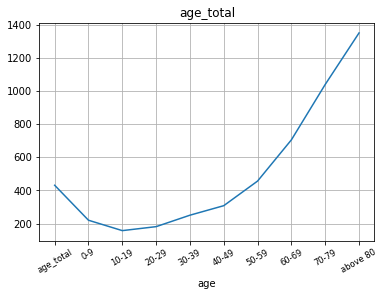

In [81]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_Total)
labels= ax.set_xticklabels(age_label, rotation = 30, fontsize = 'small')
ax.set_xlabel('age')
ax.set_title('age_total')
plt.grid(True)

크게 연령별로 1인당 본인부담금의 차이가 어떤지 위의 그래프를 통해 확인해보면, 대체적으로 나이가 증가할수록 본인부담금이 증가하는 것을 볼 수 있습니다.

### (2) 연령에 따라 성별로 분류하여 data 만들기

이 아래에는 각 연령에따라 지역별 1인당 본인부담금을 분류하고, 이를 시각화한 code입니다.\
성별에 따른 수치 또한 그래프에 포함할 예정이기에 성별에 따라 data를 먼저 분류하였습니다.

In [8]:
total_1인당본인부담금_지역_Total = total_1인당본인부담금_지역.loc['region_total']
age_label = total_1인당본인부담금_지역_Total.index.to_list()

In [9]:
total_data5=total_data3.unstack()
new_index=['Total','Seoul','Busan','Daegu','Incheon','Gwangju','Daejeon','Ulsan','Sejong','Gyonggi','Gangwon',
          'Chungbuk','Chungnam','Jeonbuk','Jeonnam','Gyeongbuk','Gyeongnam','Jeju']
total_data5.index=new_index

total_1인당본인부담금_gender=total_data5.stack()

total_1인당본인부담금_지역_male=total_1인당본인부담금_gender.iloc[1::3]
total_1인당본인부담금_지역_male.index=new_index

total_1인당본인부담금_지역_female=total_1인당본인부담금_gender.iloc[2::3]
total_1인당본인부담금_지역_female.index=new_index

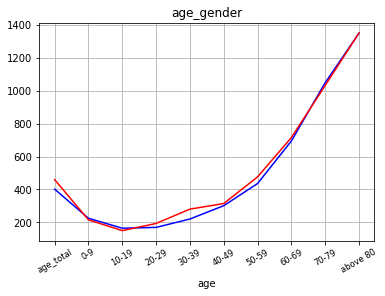

In [10]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male.loc['Total'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female.loc['Total'], color= 'red')
labels= ax.set_xticklabels(age_label,rotation = 30, fontsize = 'small')
ax.set_xlabel('age')
ax.set_title('age_gender')
plt.grid(True)

이 그래프를 통해 알 수 있듯이 성별에 따른 차이는 많지 않은 것을 알 수 있습니다.

### (3) 지역별, 성별 1인당 본인부담금

연령별, 성별을 가지고 구분한 1인당 본인부담금을 통해 자신이 어떤 group에 속해있는지, 그 group은 지역에 따라서 본인이 얼만큼 부담하여야하는지 알 수 있습니다. \
이를 통해 지역별로 비교를 해 볼 수 있습니다. \
또한, 이후 의료시스템의 수와 연관시켜 좀 더 비교를 할 수 있을 것입니다.

#### 3-1) 나이 전체

<BarContainer object of 18 artists>

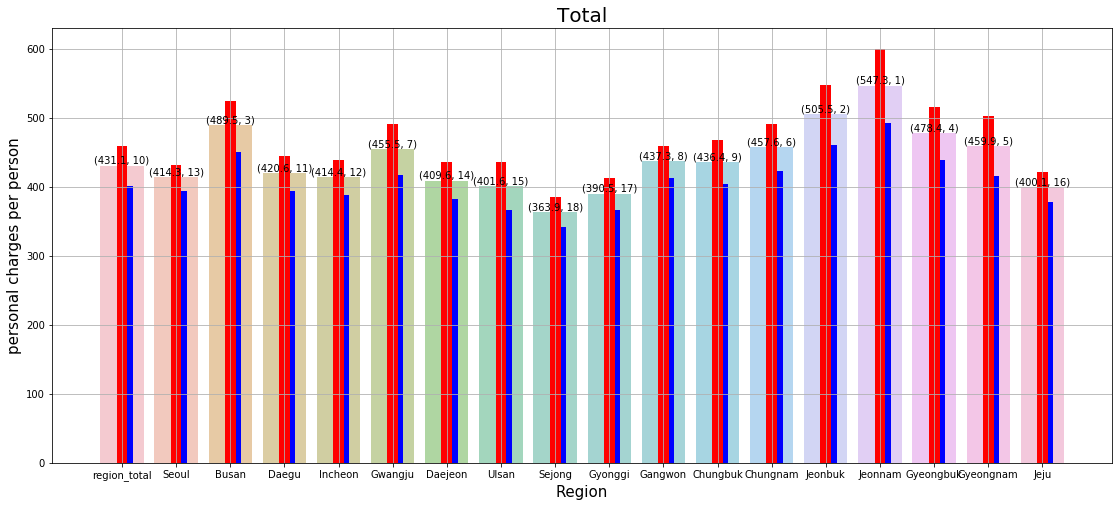

In [17]:
x = list(total_1인당본인부담금_지역.index)
y = total_1인당본인부담금_지역['age_total']
r = np.arange(len(x))

tot = []
a = list(y)
b =  list(y.rank(ascending = False))
for i in range(len(a)):
    tot.append((round(a[i], 1), int(b[i])))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y, alpha = 0.5)
plt.title("Total",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)

for i, v in enumerate(r):
    plt.text(v, y[i], tot[i], horizontalalignment = 'center', verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['age_total'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['age_total'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

연령 전체 그래프에 대해 먼저 설명하자면, \
각 성별의 수치가 (특히 여성의 수치가) 각 연령에서의 전체 수치보다 높은것은 total은 성별 전체 total을 통해 분석한 값을, 남성은 남성만을 보았을 때의 total을 통해 분석한 값을, 여성은 여성만을 보았을 때의 total을 통해 분석한 값을 나타내고 있기 때문입니다. \
다시말해, total은 남여 수치의 평균을 나타내고 있습니다. \
아래의 그래프들 또한 연령 전체 그래프와 같은 상황을 전제하고 있습니다.

#### 3-2) 0~9세

<BarContainer object of 18 artists>

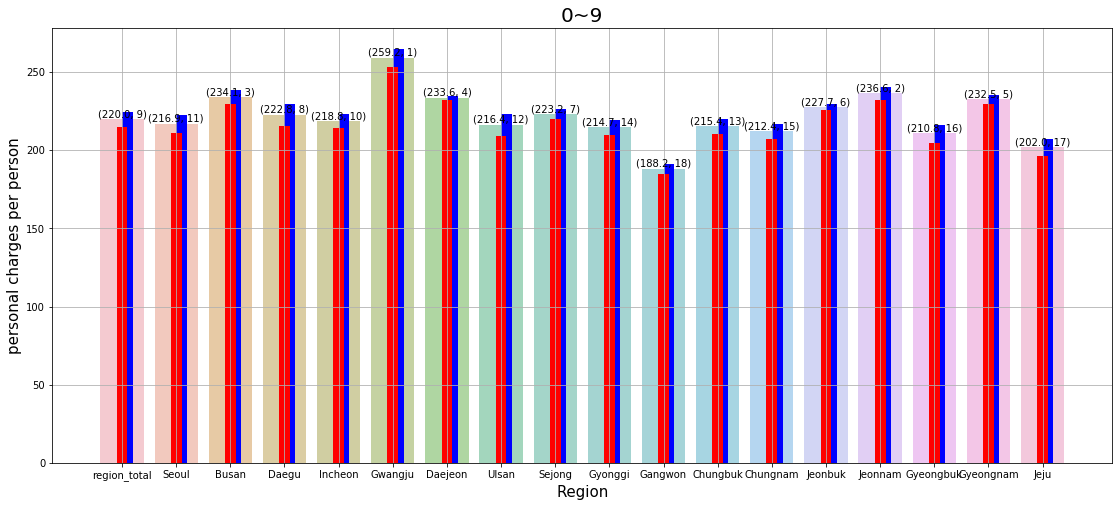

In [26]:
x = list(total_1인당본인부담금_지역.index)
y0 = total_1인당본인부담금_지역['0-9']
r = np.arange(len(x))

tot0 = []
a0 = list(y0)
b0 =  list(y0.rank(ascending = False))
for i in range(len(a0)):
    tot0.append((round(a0[i], 1), int(b0[i])))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y0, alpha = 0.5)
plt.title("0~9",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y0[i], tot0[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['0-9'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['0-9'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-3) 10~19세

<BarContainer object of 18 artists>

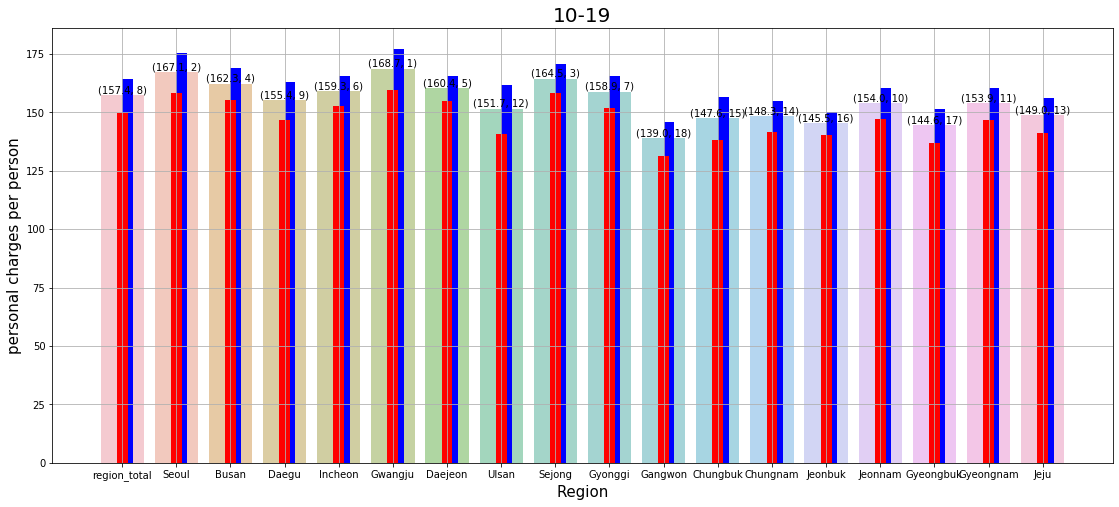

In [27]:
x = list(total_1인당본인부담금_지역.index)
y1 = total_1인당본인부담금_지역['10-19']
r = np.arange(len(x))

tot1 = []
a1 = list(y1)
b1 =  list(y1.rank(ascending = False))
for i in range(len(a1)):
    tot1.append((round(a1[i], 1), int(b1[i])))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y1, alpha = 0.5)
plt.title("10-19",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y1[i], tot1[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['10-19'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['10-19'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-4) 20~29세

<BarContainer object of 18 artists>

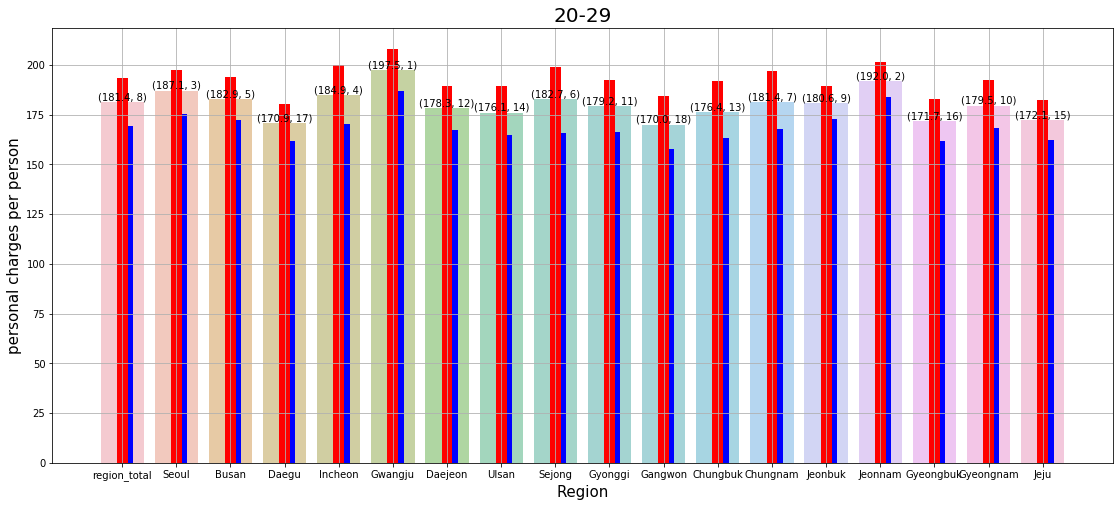

In [28]:
x = list(total_1인당본인부담금_지역.index)
y2 = total_1인당본인부담금_지역['20-29']
r = np.arange(len(x))

tot2 = []
a2 = list(y2)
b2 =  list(y2.rank(ascending = False))
for i in range(len(a2)):
    tot2.append((round(a2[i], 1), int(b2[i])))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y2, alpha = 0.5)
plt.title("20-29",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y2[i], tot2[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['20-29'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['20-29'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-5) 30~39세

<BarContainer object of 18 artists>

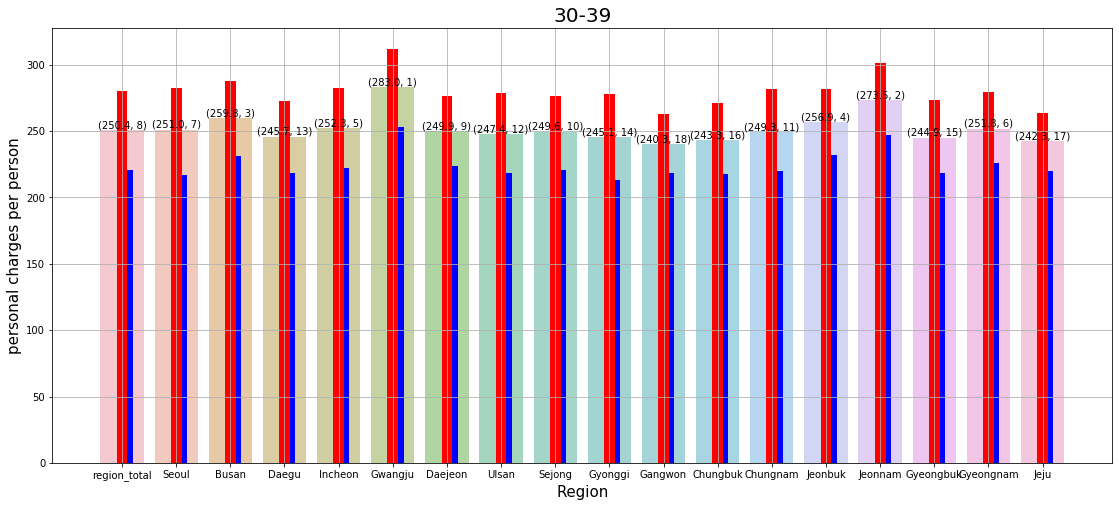

In [29]:
x = list(total_1인당본인부담금_지역.index)
y3 = total_1인당본인부담금_지역['30-39']
r = np.arange(len(x))

tot3 = []
a3 = list(y3)
b3 =  list(y3.rank(ascending = False))
for i in range(len(a3)):
    tot3.append((round(a3[i], 1), int(b3[i])))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y3, alpha = 0.5)
plt.title("30-39",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y3[i], tot3[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['30-39'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['30-39'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-6) 40~49세

<BarContainer object of 18 artists>

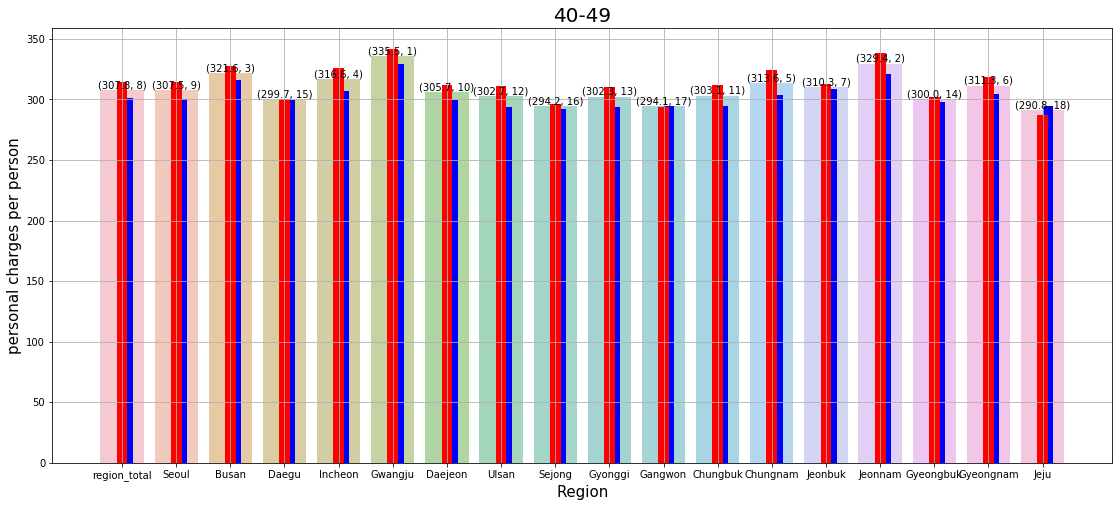

In [30]:
x = list(total_1인당본인부담금_지역.index)
y4 = total_1인당본인부담금_지역['40-49']
r = np.arange(len(x))

tot4 = []
a4 = list(y4)
b4 =  list(y4.rank(ascending = False))
for i in range(len(a4)):
    tot4.append((round(a4[i], 1), int(b4[i])))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y4, alpha = 0.5)
plt.title("40-49",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y4[i], tot4[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['40-49'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['40-49'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-7) 50~59세

<BarContainer object of 18 artists>

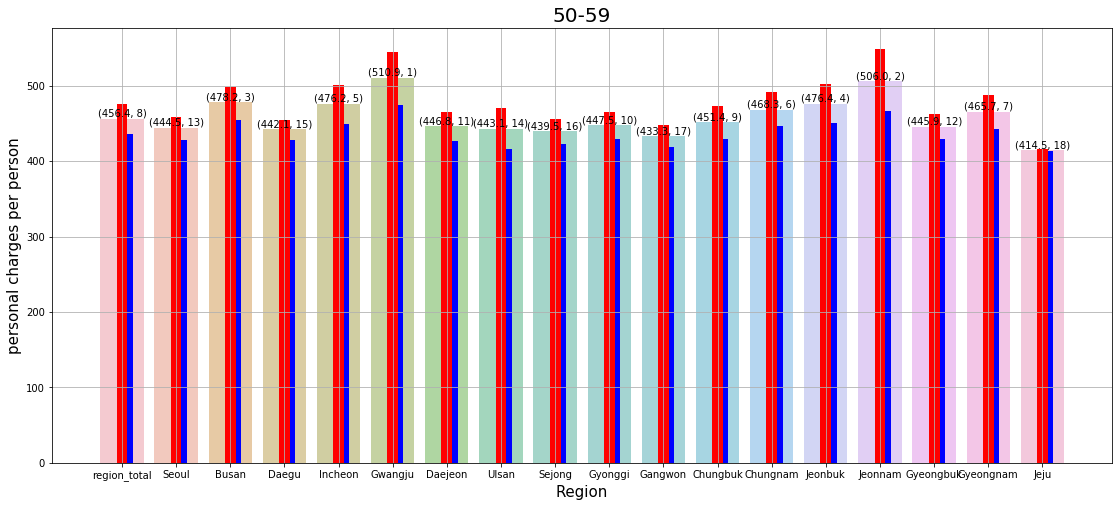

In [31]:
x = list(total_1인당본인부담금_지역.index)
y5 = total_1인당본인부담금_지역['50-59']
r = np.arange(len(x))

tot5 = []
a5 = list(y5)
b5 =  list(y5.rank(ascending = False))
for i in range(len(a5)):
    tot5.append((round(a5[i], 1), int(b5[i])))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y5, alpha = 0.5)
plt.title("50-59",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y5[i], tot5[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['50-59'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['50-59'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-8) 60~69세

<BarContainer object of 18 artists>

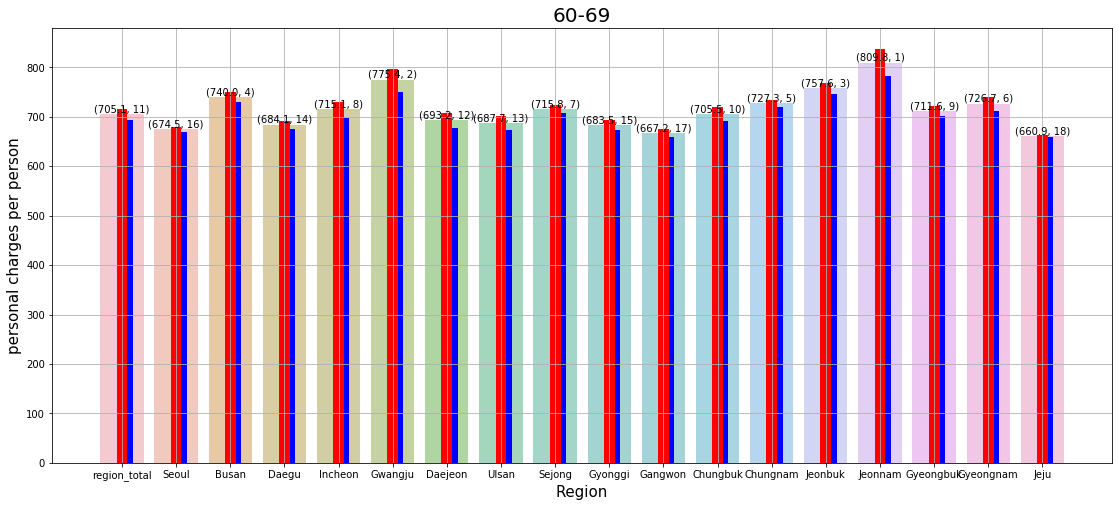

In [32]:
x = list(total_1인당본인부담금_지역.index)
y6 = total_1인당본인부담금_지역['60-69']
r = np.arange(len(x))

tot6 = []
a6 = list(y6)
b6 =  list(y6.rank(ascending = False))
for i in range(len(a6)):
    tot6.append((round(a6[i], 1), int(b6[i])))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y6, alpha = 0.5)
plt.title("60-69",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y6[i], tot6[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['60-69'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['60-69'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-9) 70~70세

<BarContainer object of 18 artists>

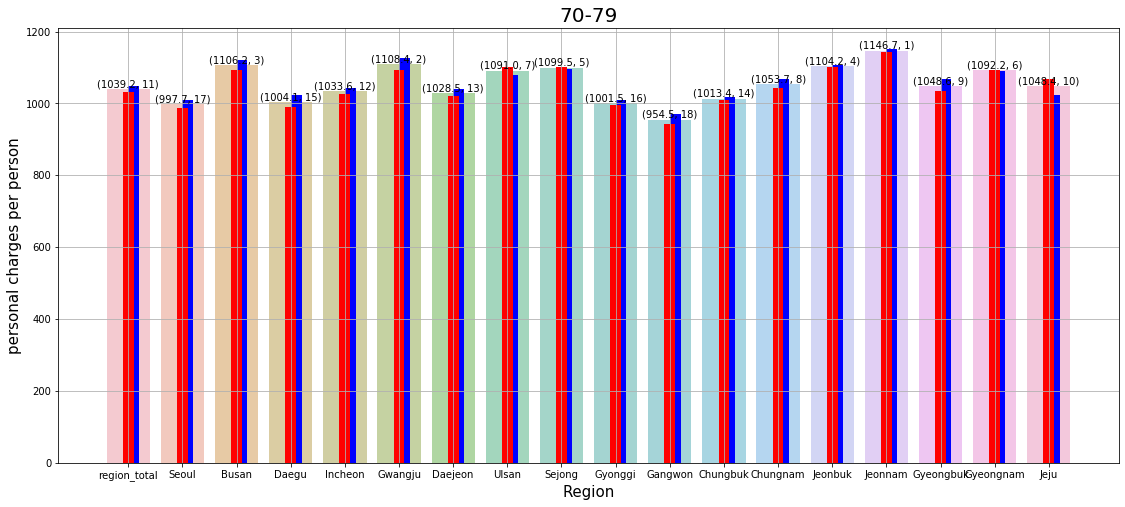

In [33]:
x = list(total_1인당본인부담금_지역.index)
y7 = total_1인당본인부담금_지역['70-79']
r = np.arange(len(x))

tot7 = []
a7 = list(y7)
b7 =  list(y7.rank(ascending = False))
for i in range(len(a7)):
    tot7.append((round(a7[i], 1), int(b7[i])))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y7, alpha = 0.5)
plt.title("70-79",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y7[i], tot7[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['70-79'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['70-79'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-10) 80세 이상

<BarContainer object of 18 artists>

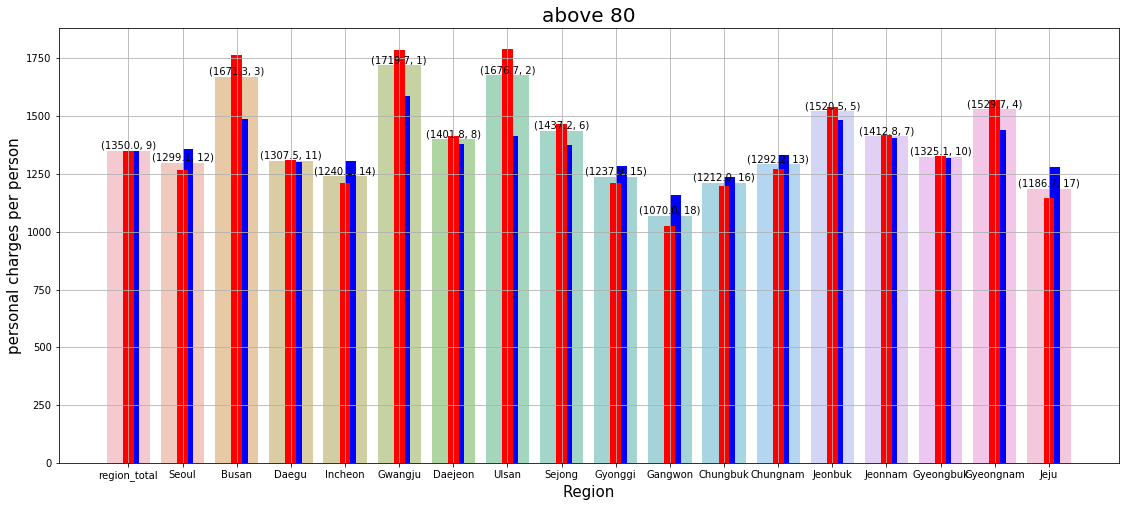

In [34]:
x = list(total_1인당본인부담금_지역.index)
y8 = total_1인당본인부담금_지역['above 80']
r = np.arange(len(x))

tot8 = []
a8 = list(y8)
b8 =  list(y8.rank(ascending = False))
for i in range(len(a8)):
    tot8.append((round(a8[i], 1), int(b8[i])))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y8, alpha = 0.5)
plt.title("above 80",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y8[i], tot8[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['above 80'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['above 80'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

### 의료보장적용인구-Population Medical Security

의료보장 적용 인구 데이터 불러오기

In [63]:
pop_data=pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '10p_인구')

pop_data=pop_data.dropna()
pop_data.index=new_index

for col in pop_data.columns:
    if not col=='Unnamed: 1':
        del pop_data[col]
pop_data.columns=['Population']

의료 시스템 자료 불러오기

In [64]:
dat1 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '18p심평원', header = [4])
dat1 = dat1.dropna()
t1 = dat1[['구      분', '계\nTotal']]
t1.columns = ['구분', '요양기관']

In [65]:
dat2 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '20p', header = [4, 5])
dat2 = dat2.dropna()
t2 = dat2[[('구   분', 'Unnamed: 0_level_1'), ('                                계\nTotal', 'Unnamed: 1_level_1')]]
t2.columns = ['구분', '의료인력']

In [66]:
dat3 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '22p', header = [4, 5, 6])
dat3 = dat3.dropna()
t3 = dat3[[('구   분', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'), 
           ('계                                          Total', 'Unnamed: 1_level_1', '병실  Ward'),
           ('계                                          Total', 'Unnamed: 2_level_1', '병상  Bed')]]

In [67]:
t4 = t3[[('구   분', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'),
         ('계                                          Total', 'Unnamed: 1_level_1', '병실  Ward')]]
t4.columns = ['구분', '주요시설_병실']

In [68]:
t5 = t3[[('구   분', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'),
         ('계                                          Total', 'Unnamed: 2_level_1', '병상  Bed')]]
t5.columns = ['구분', '주요시설_병상']

In [69]:
dat4 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '24p', header = [4])
dat4 = dat4.dropna()
t6 = dat4[['구   분', '계\nTotal']]
t6.columns = ['구분', '주요_의료장비']

#### total 의료시스템

요양기관-Care Institutions/의료인력-Medical Personnel/병실-Ward/병상-Bed/의료장비-Medical Equipments

In [70]:
total = pd.merge(t1, t2 , on = '구분')
total = pd.merge(total, t4, on = '구분')
total = pd.merge(total, t5, on = '구분')
total = pd.merge(total, t6, on = '구분')
total.index=new_index
del total['구분']

medical_columns=['Care Institutions','Medical Personnel','Ward','Bed','Medical Equipments']
total.columns=medical_columns

In [71]:
total_no_Total=total.drop('Total')

In [72]:
new_index_no_Total=['Seoul','Busan','Daegu','Incheon','Gwangju','Daejeon','Ulsan','Sejong','Gyonggi','Gangwon',
          'Chungbuk','Chungnam','Jeonbuk','Jeonnam','Gyeongbuk','Gyeongnam','Jeju']

지역별로 의료시스템의 개수

No handles with labels found to put in legend.


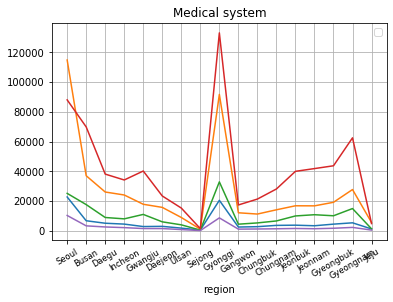

In [73]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_no_Total)
labels= ax.set_xticklabels(new_index_no_Total,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Medical system')
ax.legend(loc = 'best')
plt.grid(True)

In [84]:
total_no_Total

,Care Institutions,Medical Personnel,Ward,Bed,Medical Equipments
Seoul,22739.0,114861.0,25170.0,88059.0,10304.0
Busan,6752.0,37028.0,17621.0,69862.0,3322.0
Daegu,5083.0,26087.0,8946.0,38132.0,2578.0
Incheon,4497.0,24081.0,8028.0,34176.0,2125.0
Gwangju,2852.0,17835.0,11018.0,40206.0,1512.0
Daejeon,2984.0,15746.0,6018.0,23417.0,1490.0
Ulsan,1801.0,8950.0,4004.0,15284.0,820.0
Sejong,491.0,1109.0,440.0,1440.0,155.0
Gyonggi,20491.0,91723.0,32901.0,133118.0,8677.0
Gangwon,2519.0,12115.0,4447.0,17372.0,1113.0


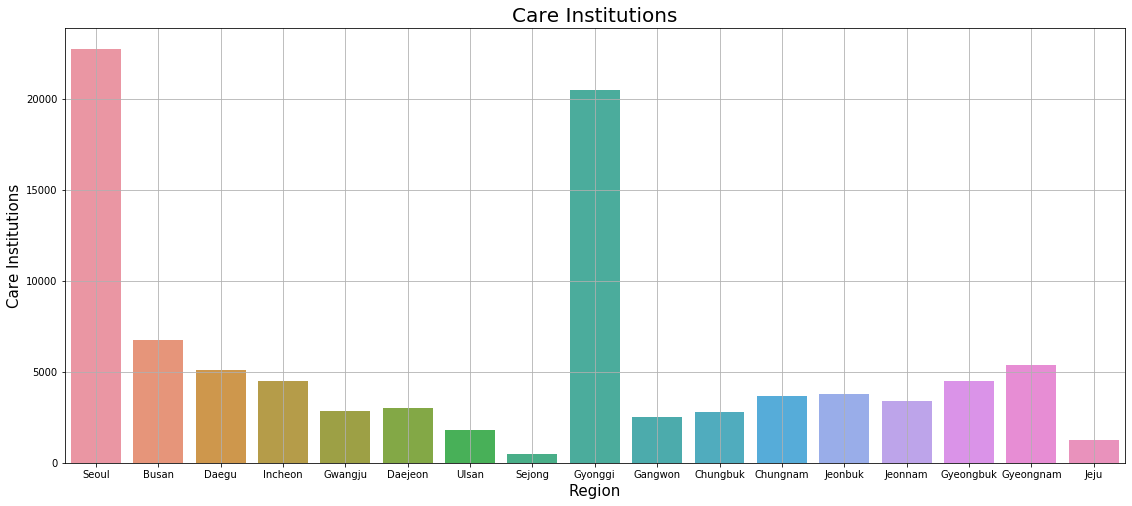

In [85]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total_no_Total.index,y=total_no_Total['Care Institutions'] )
plt.title('Care Institutions',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Care Institutions',fontsize=15)
plt.grid(True)

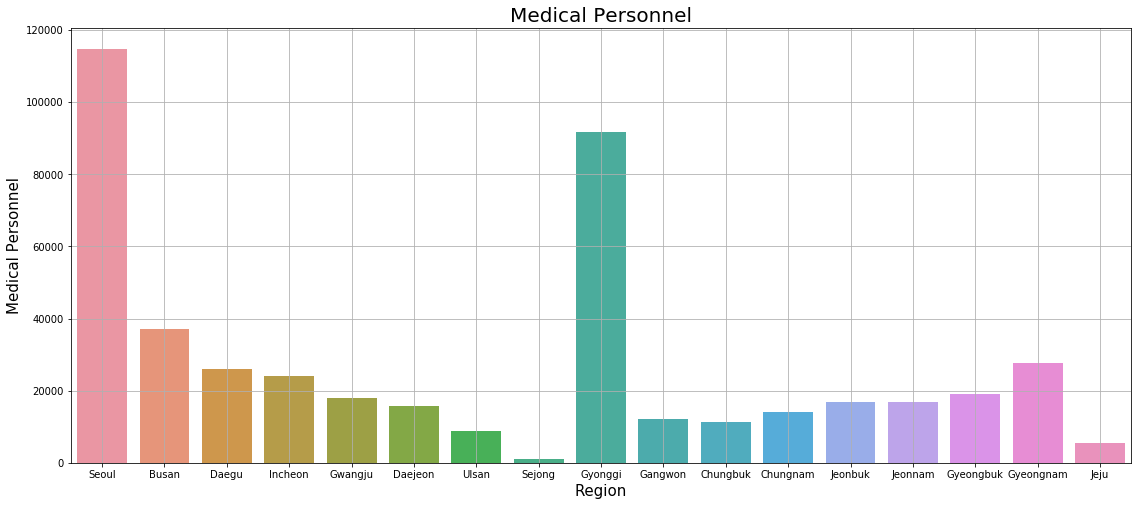

In [86]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total_no_Total.index,y=total_no_Total['Medical Personnel'] )
plt.title('Medical Personnel',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Personnel',fontsize=15)
plt.grid(True)

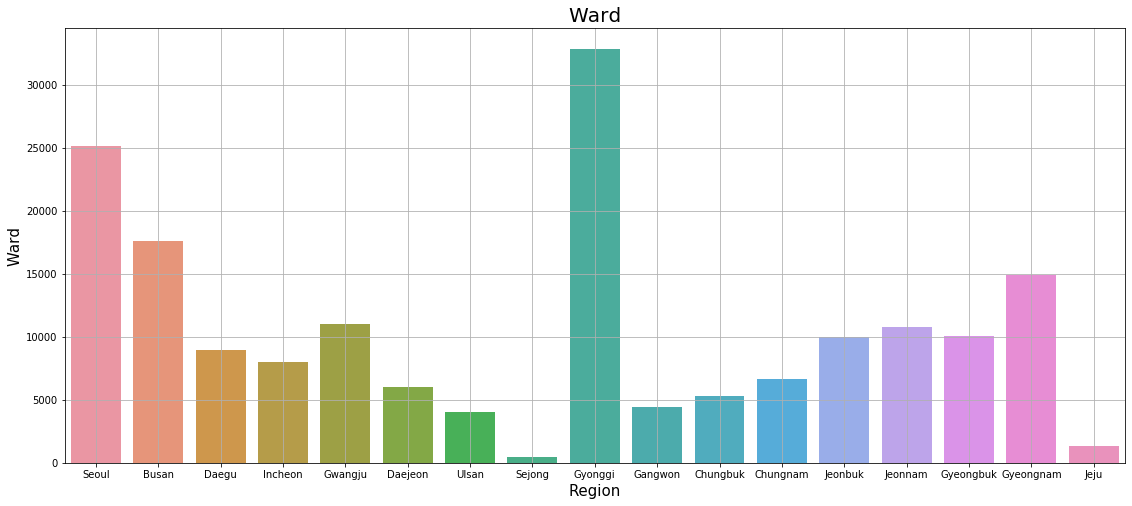

In [88]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total_no_Total.index,y=total_no_Total['Ward'] )
plt.title('Ward',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Ward',fontsize=15)
plt.grid(True)

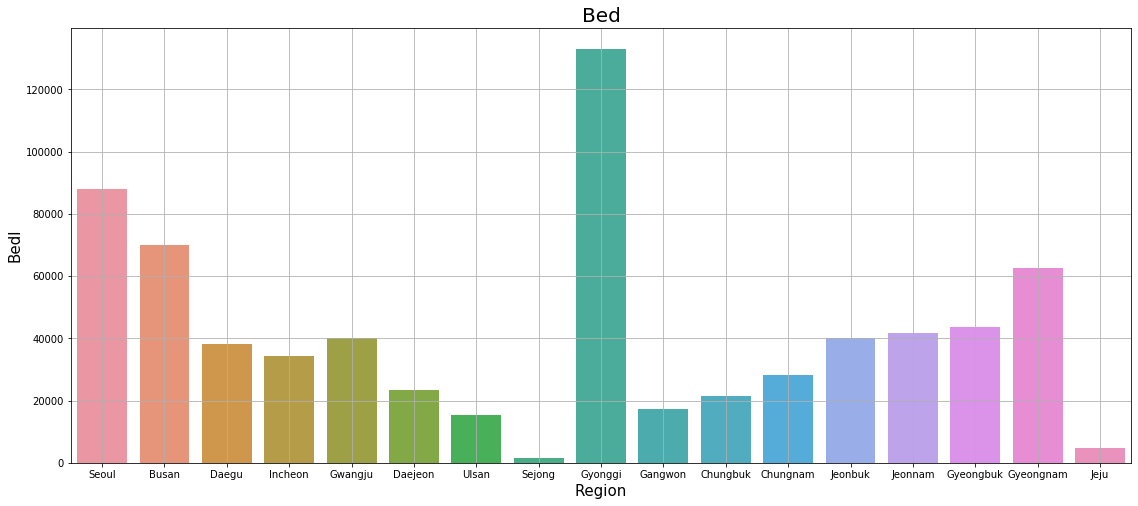

In [90]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total_no_Total.index,y=total_no_Total['Bed'] )
plt.title('Bed',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Bedl',fontsize=15)
plt.grid(True)


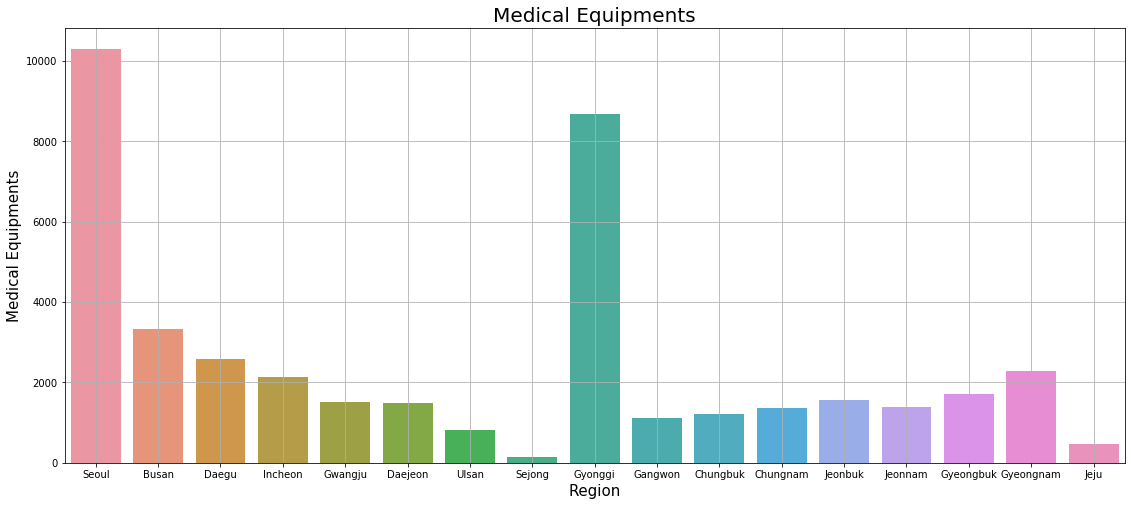

In [93]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total_no_Total.index,y=total_no_Total['Medical Equipments'] )
plt.title('Medical Equipments',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Equipments',fontsize=15)
plt.grid(True)

In [74]:
total

,Care Institutions,Medical Personnel,Ward,Bed,Medical Equipments
Total,94865.0,460995.0,177674.0,703468.0,42058.0
Seoul,22739.0,114861.0,25170.0,88059.0,10304.0
Busan,6752.0,37028.0,17621.0,69862.0,3322.0
Daegu,5083.0,26087.0,8946.0,38132.0,2578.0
Incheon,4497.0,24081.0,8028.0,34176.0,2125.0
Gwangju,2852.0,17835.0,11018.0,40206.0,1512.0
Daejeon,2984.0,15746.0,6018.0,23417.0,1490.0
Ulsan,1801.0,8950.0,4004.0,15284.0,820.0
Sejong,491.0,1109.0,440.0,1440.0,155.0
Gyonggi,20491.0,91723.0,32901.0,133118.0,8677.0


In [45]:
total1=total

In [ ]:
# total_data=pd.concat([data1.T,data2.T,data3.T,data4.T,data5.T]).T

In [ ]:
# sns.lmplot(x = "price", y = "sales", data = sales)

In [75]:
population=pop_data.to_numpy()

Care_Institutions=total.to_numpy()[:,[0]]
Medical_Personnel=total.to_numpy()[:,[1]]
Ward=total.to_numpy()[:,[2]]
Bed=total.to_numpy()[:,[3]]
Medical_Equipments=total.to_numpy()[:,[4]]

In [47]:
total1['Care Institutions']=population/Care_Institutions
total1['Medical Personnel']=population/Medical_Personnel
total1['Ward']=population/Ward
total1['Bed']=population/Bed
total1['Medical Equipments']=population/Medical_Equipments

### 개당 사용가능 인구 수

즉 높을 수록 개당 사용가능 인구수가 큰 것이다.\
높으면\
인구 수/기기 및 의료시스템 수

No handles with labels found to put in legend.


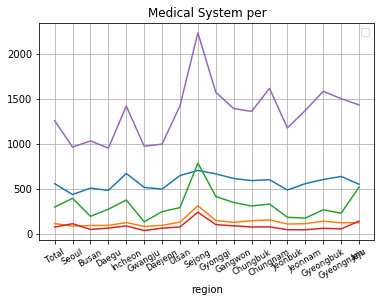

In [48]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1)
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Medical System per')
ax.legend(loc = 'best')
plt.grid(True)

No handles with labels found to put in legend.


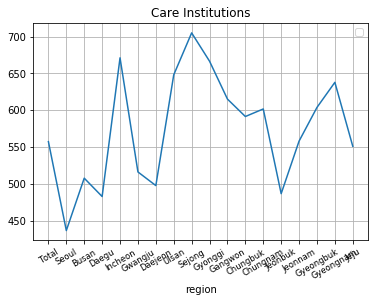

In [49]:
# Care Institutions
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1['Care Institutions'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Care Institutions')
ax.legend(loc = 'best')
plt.grid(True)

No handles with labels found to put in legend.


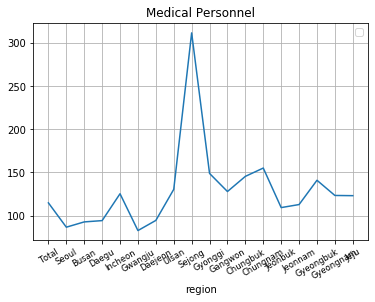

In [50]:
# Medical Personnel
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1['Medical Personnel'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Medical Personnel')
ax.legend(loc = 'best')
plt.grid(True)

No handles with labels found to put in legend.


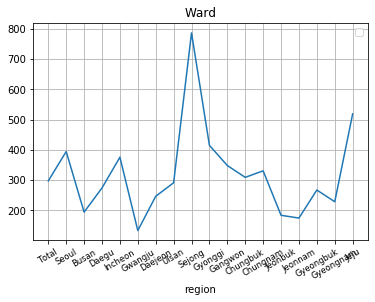

In [51]:
# Ward
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1['Ward'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Ward')
ax.legend(loc = 'best')
plt.grid(True)

No handles with labels found to put in legend.


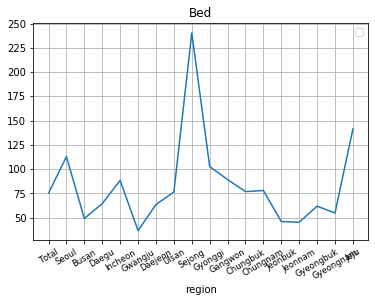

In [52]:
# Bed
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1['Bed'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Bed')
ax.legend(loc = 'best')
plt.grid(True)

No handles with labels found to put in legend.


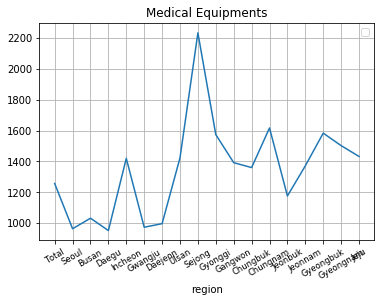

In [53]:
# Medical Equipments
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total1['Medical Equipments'])
labels= ax.set_xticklabels(new_index,rotation = 30, fontsize = 'small')
ax.set_xlabel('region')
ax.set_title('Medical Equipments')
ax.legend(loc = 'best')
plt.grid(True)

total1은 한 기계, 의사당 환자 수 \
total1/medi_mean은 평균과의 비교. 1일경우 평균, 1보다 적을수록 평균 미만, 1보다 많을수록 평균 초과

In [54]:
medi_mean = total1.mean()
ratio_total1 = total1/medi_mean
totalll = total_1인당본인부담금_지역['total']
totalll = totalll/totalll.mean()
overall = ratio_total1.join(totalll)

In [63]:
overall

,Care Institutions,Medical Personnel,Ward,Bed,Medical Equipments,total
Total,0.970749,0.890207,0.9278,0.90085,0.932753,0.980501
Seoul,0.760752,0.671144,1.23026,1.35184,0.715172,0.942389
Busan,0.88448,0.718728,0.606673,0.588252,0.765813,1.11347
Daegu,0.841129,0.730353,0.855498,0.771573,0.706483,0.956691
Incheon,1.16869,0.972573,1.17187,1.05824,1.05358,0.942657
Gwangju,0.899156,0.640746,0.416627,0.438912,0.722495,1.03617
Daejeon,0.86697,0.732161,0.769513,0.760248,0.739637,0.93161
Ulsan,1.12855,1.01201,0.908665,0.915123,1.0559,0.913372
Sejong,1.22759,2.42201,2.45214,2.88041,1.65655,0.827629
Gyonggi,1.16067,1.1555,1.29399,1.22948,1.16763,0.888241


숫자가 작을 수록 1인당 본인부담금에 비해 의료시스템 당 사용가능 인구가 적다는 것을 뜻한다.

In [55]:
care_ratio = overall['Care Institutions']/overall['total']
care_ratio.sort_values()

Jeonbuk      0.737369
Jeonnam      0.780766
Busan        0.794343
Seoul        0.807259
Gwangju      0.867768
Daegu        0.879206
Daejeon      0.930614
Gyeongbuk    0.966331
Total        0.990054
Chungnam      1.00687
Chungbuk      1.03764
Jeju          1.05456
Gyeongnam     1.06192
Gangwon       1.07705
Ulsan         1.23558
Incheon       1.23978
Gyonggi       1.30671
Sejong        1.48326
dtype: object

In [56]:
medi_ratio = overall['Medical Personnel']/overall['total']
medi_ratio.sort_values()

Gwangju      0.618378
Busan        0.645482
Jeonnam      0.702917
Seoul        0.712173
Jeonbuk      0.737241
Daegu        0.763415
Daejeon       0.78591
Total         0.90791
Gyeongnam    0.914925
Gangwon      0.997965
Gyeongbuk     1.00528
Incheon       1.03174
Jeju          1.04947
Ulsan         1.10799
Chungbuk      1.13732
Chungnam      1.15683
Gyonggi       1.30089
Sejong        2.92644
dtype: object

In [57]:
ward_ratio = overall['Ward']/overall['total']
ward_ratio.sort_values()

Gwangju      0.402083
Jeonnam      0.438119
Jeonbuk      0.498939
Busan        0.544847
Gyeongnam    0.681849
Gyeongbuk    0.766469
Daejeon      0.826003
Daegu        0.894226
Total         0.94625
Chungbuk       0.9717
Chungnam     0.991287
Ulsan        0.994846
Gangwon        1.0921
Incheon       1.24316
Seoul         1.30547
Gyonggi        1.4568
Jeju          1.77776
Sejong        2.96285
dtype: object

In [58]:
medieq_ratio = overall['Medical Equipments']/overall['total']
medieq_ratio.sort_values()

Busan        0.687769
Gwangju      0.697274
Daegu        0.738465
Seoul        0.758893
Jeonbuk      0.758941
Daejeon      0.793934
Jeonnam      0.817392
Total        0.951302
Chungbuk      1.01659
Gangwon       1.03842
Gyeongnam     1.06566
Gyeongbuk     1.07956
Incheon       1.11767
Chungnam      1.15254
Ulsan         1.15604
Jeju          1.16763
Gyonggi       1.31455
Sejong        2.00156
dtype: object

In [59]:
#[제일 낮은 거, 두번째 낮은 거][두번째 높은 거, 제일 높은 거]
for i in total1.columns.to_list():
    print(i,total1[i].sort_values().index.to_list()[0:2],
         total1[i].sort_values().index.to_list()[-2:])

Care Institutions ['Seoul', 'Daegu'] ['Incheon', 'Sejong']
Medical Personnel ['Gwangju', 'Seoul'] ['Chungnam', 'Sejong']
Ward ['Gwangju', 'Jeonnam'] ['Jeju', 'Sejong']
Bed ['Gwangju', 'Jeonnam'] ['Jeju', 'Sejong']
Medical Equipments ['Daegu', 'Seoul'] ['Chungnam', 'Sejong']


In [60]:
#부담금이[제일 많은 곳, 두번째 많은 곳][두번째 적은 곳, 제일 적은 곳]
for i in total_1인당본인부담금_지역.columns.to_list():
    print(i,total_1인당본인부담금_지역[i].sort_values().index.to_list()[0:2],
         total_1인당본인부담금_지역[i].sort_values().index.to_list()[-2:])

total ['Sejong', 'Gyonggi'] ['Jeonbuk', 'Jeonnam']
0-9 ['Gangwon', 'Jeju'] ['Jeonnam', 'Gwangju']
10-19 ['Gangwon', 'Gyeongbuk'] ['Seoul', 'Gwangju']
20-29 ['Gangwon', 'Daegu'] ['Jeonnam', 'Gwangju']
30-39 ['Gangwon', 'Jeju'] ['Jeonnam', 'Gwangju']
40-49 ['Jeju', 'Gangwon'] ['Jeonnam', 'Gwangju']
50-59 ['Jeju', 'Gangwon'] ['Jeonnam', 'Gwangju']
60-69 ['Jeju', 'Gangwon'] ['Gwangju', 'Jeonnam']
70-79 ['Gangwon', 'Seoul'] ['Gwangju', 'Jeonnam']
above 80 ['Gangwon', 'Jeju'] ['Ulsan', 'Gwangju']


# 3. 결론

## (1) 데이터를 분석한 결과

## (2) 데이터 분석을 하며 느낀점

### 1) 김도형

### 2) 박지우

데이터 분석을 하기 전에는 보험에 대해서 몰랐습니다. 종류가 어떻게 된는 것이고, 회사는 어떤 것들이 있고, 보험 처리 과정이 어떤식으로 진행되는지 몰랐습니다. \
데이터 분석을 하기 위해 보험의 종류에 대해서도 알아보고, 이전 주제인 '어느 보험사가 더 이득인지'에 대해 알아보며 회사의 종류도 알게되었습니다. 또한, 국민건강보험의 처리과정도 가볍게나마 알게되었습니다. \
\
이런 것 뿐만 아니라 데이터를 분석하는데 있어서, 발표를 할 때에는 목적이 정확하지 않았고, 그것을 이유로 흐지부지한 채로 발표를 마무리하였던것 같습니다. 하지만 좋은 기회가 다시 찾아와서 진행했던 분석을 다시 한번 정리할 기회가 생겼고, 그 과정동안 수업시간에 배운 내용을 참고하여 어떤 자료형에는 어떤 분석이 더 적합한지, 독자 입장에서는 어떤 시각화가 더 보기 편할지를 생각하며 다시 coding할 수 있었고, 목적을 정확히 다시 찾아 원하는 방향으로 데이터를 분석하고, 생각을 정리해 볼 수 있었습니다.\
\
이를 계기로 다음 기말 프로젝트에서는 처음 발표부터 명확하게 목표를 세우고, 그에 맞게 데이터를 찾아보고, 분석해 나가야겠다는 생각을 하게 되었습니다.